In [1]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *

import sklearn.metrics
import datetime
torch.cuda.set_device(2)

import fastai

RuntimeError: cuda runtime error (10) : invalid device ordinal at /opt/conda/conda-bld/pytorch-nightly_1542704888940/work/torch/csrc/cuda/Module.cpp:34

In [2]:
fastai.__version__

NameError: name 'fastai' is not defined

In [15]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels2')
LM_DATA_PATH = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmdata/')

In [16]:
# Language model data
data_clas_train = pd.read_csv(LM_DATA_PATH/'train_proc.csv')
data_clas_val = pd.read_csv(LM_DATA_PATH/'val_proc.csv')

data_clas_train = data_clas_train[['class', 'text_proc']]
data_clas_val = data_clas_val[['class', 'text_proc']]

data_lm = TextLMDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, backwards=False, max_vocab=10000)

In [17]:
print(len(data_lm.train_ds.vocab.itos))

10002


In [18]:
data_lm.save()

In [19]:
!ls {EX_PA}

tmp


In [4]:
# data_lm = TextLMDataBunch.load(EX_PA)

In [68]:
data_lm.valid_dl

In [13]:
download_wt103_model()

In [73]:
data_lm.valid_dl

DeviceDataLoader(dl=<fastai.text.data.LanguageModelLoader object at 0x7f47a7f43518>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x7f47d17d49d8>, skip_size1=False)

In [27]:
learn = language_model_learner(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.1)

In [38]:
exp_id = datetime.datetime.now().strftime("%Y_%_m_%d_%H_%M_%S_%f")

In [39]:
exp_id

'2018_11_10_16_10_04_906710'

In [40]:
Path(EX_PA/'models'/exp_id).mkdir(parents=True, exist_ok=True)

In [24]:
# ! ls {EX_PA/'models'}

In [75]:
learn.callbacks += [
    SaveModelCallback(learn, name=exp_id),
    CSVLogger(learn, 'history/' + exp_id ),
    EarlyStoppingCallback(learn, patience=5)
    ]

In [11]:
!ls /mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels

2018_11_10_14_12_50  2018_11_10_15_20_41_558367  history  models  tmp


In [45]:
data_lm.valid_dl

In [28]:
learn.lr_find(start_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


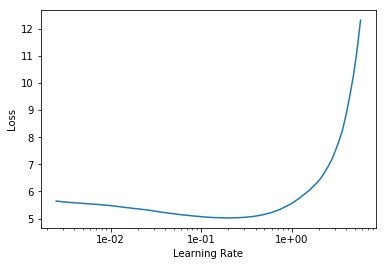

In [29]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(1, 5e-2)

Total time: 04:16
epoch  train_loss  valid_loss  accuracy
1      4.357680    4.154449    0.258080  (04:16)

